In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import numpy as np
from skimage import io
from libtiff import TIFF
from libtiff import TIFFfile, TIFFimage

In [19]:
fname = 'Inter-IIT-CSRE/The-Eye-in-the-Sky-dataset/sat/JAX_004_006_RGB.tif'
tif = TIFF.open(fname)
image = tif.read_image()

In [20]:
fname2 = 'Inter-IIT-CSRE/The-Eye-in-the-Sky-dataset/sat/JAX_017_011_RGB.tif'
tif2 = TIFF.open(fname2)
image2 = tif2.read_image()

In [22]:
rows, cols, bands = image.shape

In [23]:
classes = {'building': 0, 'water': 1, 'road': 2,'ground':3,'trees':4,'unlabelled' : 5}
n_classes = len(classes)
palette = np.uint8([[0, 0, 0], [28, 0, 249], [249, 3, 8],[128, 128, 128], [251, 255, 0], [8, 1, 126]])

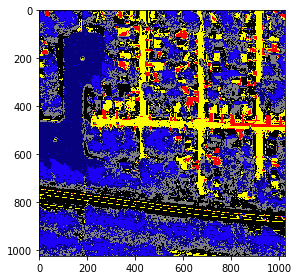

In [28]:
from sklearn.cluster import KMeans

X = image.reshape(rows*cols, bands)
kmeans = KMeans(n_clusters=n_classes, random_state=3).fit(X)
unsupervised = kmeans.labels_.reshape(rows, cols)

y = image2.reshape(rows*cols, bands)
kmeans2 = KMeans(n_clusters=n_classes, random_state=3).fit(y)
unsupervised2 = kmeans2.labels_.reshape(rows, cols)

io.imshow(palette[unsupervised])


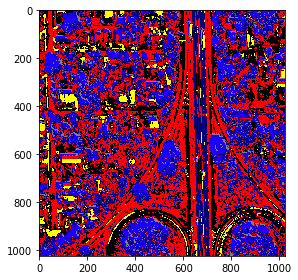

In [29]:
io.imshow(palette[unsupervised2])